In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("madfhantr.csv")
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.shape

(614, 13)

In [8]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [9]:
df.corr()

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000

In [11]:
print(df.isnull().count())

Loan_ID              614
Gender               614
Married              614
Dependents           614
Education            614
Self_Employed        614
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           614
Loan_Amount_Term     614
Credit_History       614
Property_Area        614
Loan_Status          614
dtype: int64


In [29]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
mean_value = df["Credit_History"].mean()
df["Credit_History"].fillna(value = mean_value,inplace=True)

In [44]:
mean_value = df["LoanAmount"].mean()
df["LoanAmount"].fillna(value = mean_value,inplace=True)

In [45]:
mean_value = df["Loan_Amount_Term"].mean()
df["Loan_Amount_Term"].fillna(value = mean_value,inplace=True)

In [47]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype(str))

In [48]:
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [49]:
df.corr()

Loan_ID    Gender   Married  Dependents  Education  \
Loan_ID            1.000000  0.075477  0.101695    0.023238  -0.022402   
Gender             0.075477  1.000000  0.336094    0.149674   0.024382   
Married            0.101695  0.336094  1.000000    0.338689   0.006759   
Dependents         0.023238  0.149674  0.338689    1.000000   0.060466   
Education         -0.022402  0.024382  0.006759    0.060466   1.000000   
Self_Employed     -0.049048 -0.025022 -0.038153    0.005622  -0.021130   
ApplicantIncome    0.040688  0.094472  0.052119    0.103416  -0.140760   
CoapplicantIncome  0.072263  0.073308  0.069877    0.011146  -0.062290   
LoanAmount         0.058320  0.136081  0.145541    0.130722  -0.166998   
Loan_Amount_Term  -0.066751 -0.067778 -0.096253   -0.073683  -0.077242   
Credit_History    -0.054741 -0.000490  0.010302   -0.077539  -0.077936   
Property_Area     -0.009570 -0.030903  0.007973    0.032600  -0.065243   
Loan_Status       -0.035261  0.008690  0.096657   -0.007318  -0.085884   

                   Self_Employed  ApplicantIncome  CoapplicantIncome  \
Loan_ID                -0.049048         0.040688           0.072263   
Gender                 -0.025022         0.094472           0.073308   
Married                -0.038153         0.052119           0.069877   
Dependents              0.005622         0.103416           0.011146   
Education              -0.021130        -0.140760          -0.062290   
Self_Employed           1.000000         0.095664           0.052218   
ApplicantIncome         0.095664         1.000000          -0.116605   
CoapplicantIncome       0.052218        -0.116605           1.000000   
LoanAmount              0.089806         0.565620           0.187828   
Loan_Amount_Term       -0.036965        -0.045242          -0.059675   
Credit_History          0.052701        -0.014477          -0.001665   
Property_Area          -0.013439        -0.009500           0.010522   
Loan_Status             0.010880        -0.004710          -0.059187   

                   LoanAmount  Loan_Amount_Term  Credit_History  \
Loan_ID              0.058320         -0.066751       -0.054741   
Gender               0.136081         -0.067778       -0.000490   
Married              0.145541         -0.096253        0.010302   
Dependents           0.130722         -0.073683       -0.077539   
Education           -0.166998         -0.077242       -0.077936   
Self_Employed        0.089806         -0.036965        0.052701   
ApplicantIncome      0.565620         -0.045242       -0.014477   
CoapplicantIncome    0.187828         -0.059675       -0.001665   
LoanAmount           1.000000          0.038801       -0.007738   
Loan_Amount_Term     0.038801          1.000000        0.001395   
Credit_History      -0.007738          0.001395        1.000000   
Property_Area       -0.044776         -0.077620       -0.001880   
Loan_Status         -0.036416         -0.020974        0.540483   

                   Property_Area  Loan_Status  
Loan_ID                -0.009570    -0.035261  
Gender                 -0.030903     0.008690  
Married                 0.007973     0.096657  
Dependents              0.032600    -0.007318  
Education              -0.065243    -0.085884  
Self_Employed          -0.013439     0.010880  
ApplicantIncome        -0.009500    -0.004710  
CoapplicantIncome       0.010522    -0.059187  
LoanAmount             -0.044776    -0.036416  
Loan_Amount_Term       -0.077620    -0.020974  
Credit_History         -0.001880     0.540483  
Property_Area           1.000000     0.032112  
Loan_Status             0.032112     1.000000

In [67]:
X = df[["Credit_History","ApplicantIncome","Married","Gender"]]
y = df[["Loan_Status"]]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [68]:
X_train

Credit_History  ApplicantIncome  Married  Gender
21         1.000000             5955        1       1
105        1.000000             3052        1       1
206        1.000000             3244        0       0
182        1.000000             4600        1       1
323        0.842199             3166        0       0
..              ...              ...      ...     ...
218        0.000000             5000        1       1
223        1.000000             7578        1       1
271        1.000000            11146        1       1
474        1.000000             5532        0       1
355        1.000000             3813        0       0

[491 rows x 4 columns]

In [69]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train,y_train)
model.score(X_test,y_test)



0.6666666666666666

In [53]:
df.head(
)

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        0           0          0              0   
1        1       1        1           1          0              0   
2       16       1        1           0          0              1   
3      139       1        1           0          1              0   
4      262       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.000000             360.0   
3             2583             2358.0  120.000000             360.0   
4             6000                0.0  141.000000             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0            0  
2             1.0              2            1  
3             1.0              2            1  
4             1.0              2            1

In [70]:
import matplotlib.pyplot as plt
X=df[['Credit_History','ApplicantIncome','LoanAmount', 'Gender', 'Loan_Amount_Term']]
Y=df[('Loan_Status')]

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [72]:
from sklearn.tree import DecisionTreeClassifier
full_tree=DecisionTreeClassifier()
full_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

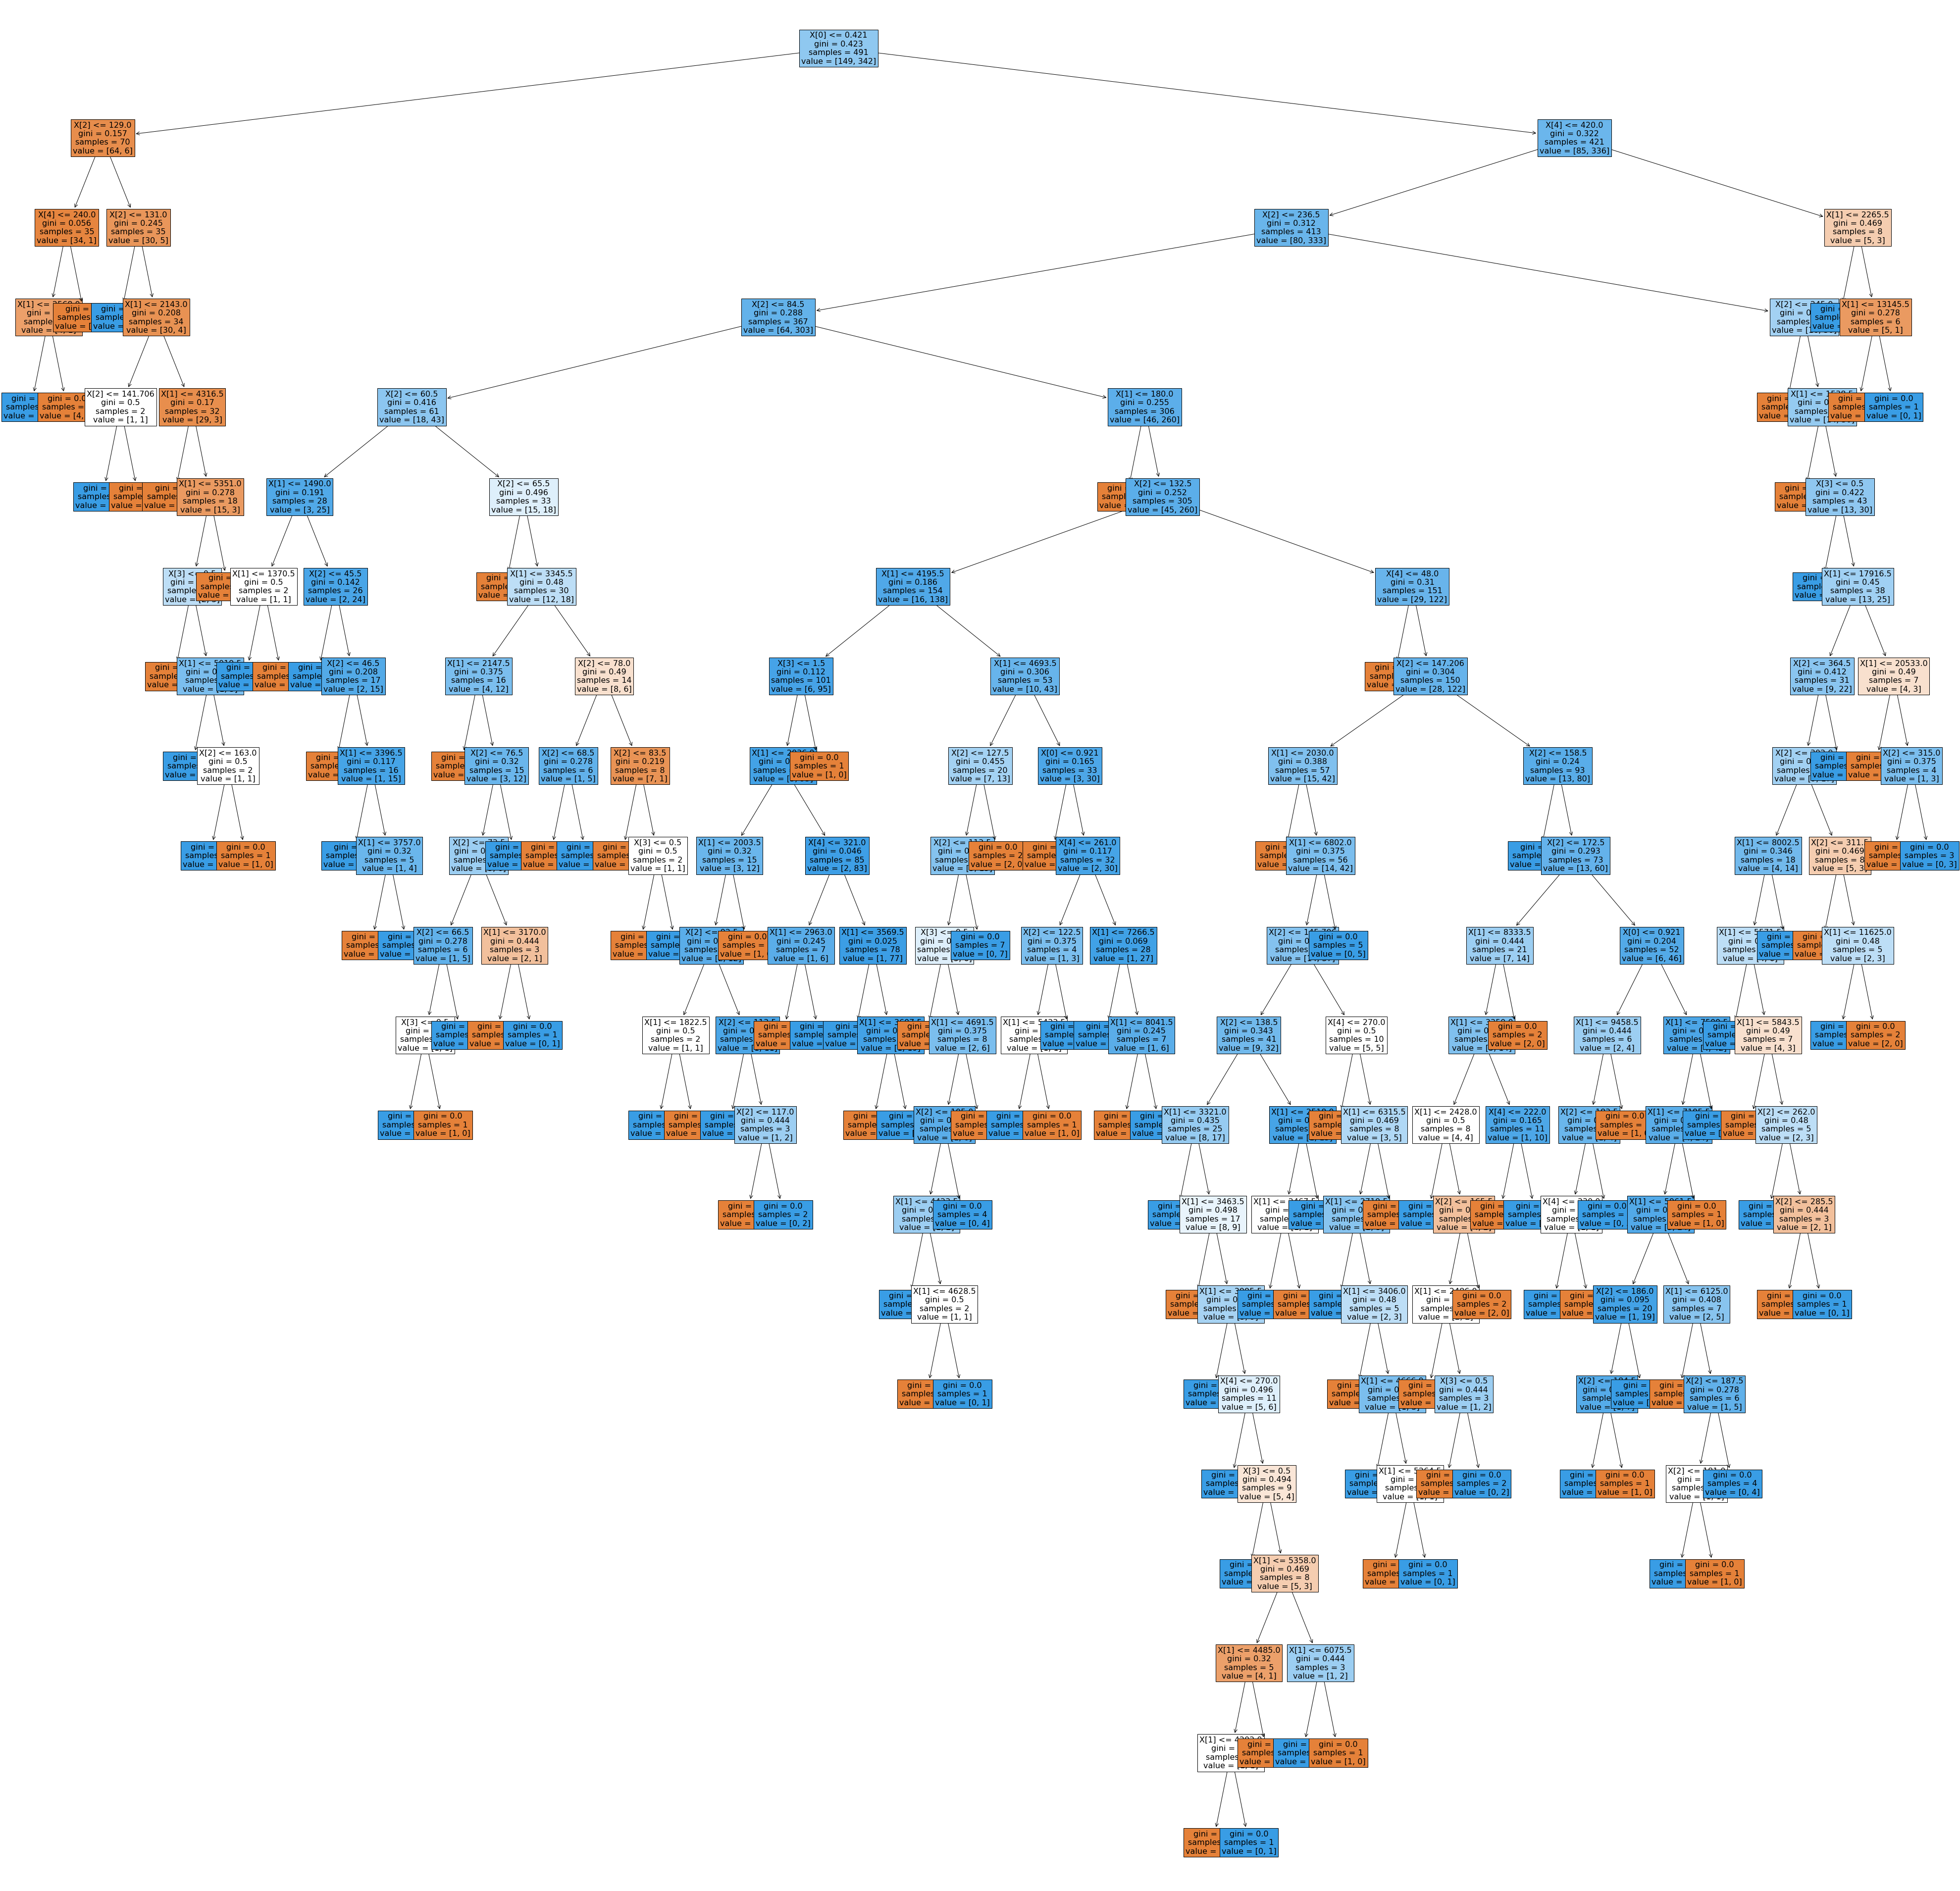

In [73]:
from sklearn import tree
plt.figure(figsize=(70,70))
classes=['Not Granted Loan','Granted Loan']
tree.plot_tree(full_tree, filled=True, fontsize=16);